In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas

warnings.simplefilter("ignore")

plt.style.use('seaborn')
plt.style.use('seaborn-paper')

from soma.generators.mnist import MnistGenerator
from soma.generators.normal import MultivariateNormalGenerator
from soma.generators.dc2 import DC2Generator
from soma.tests import som_test, knn_test, c2s_knn_test, c2s_nn_test
from soma.util.plot import plot_errors

In [2]:
plot_dir = os.path.expanduser('~/Plots/power_dim')
os.makedirs(plot_dir, exist_ok=True)

In [3]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

In [4]:
samples = 500
repeat = 200
significance = 0.1

# DC2 MAG Filtered

In [5]:
dc2 = DC2Generator()
dc2_abs = DC2Generator(abs_mag=22)
dc2_abs.dimensions

107

In [6]:
#dc2_results = stat_errors_vs_dimension(dc2_abs, dc2, tests, alpha=significance, samples=samples, repeat=repeat, step=10)
#dc2_results.to_csv('../results/dimensionality/dc2_mag_dim.csv')
dc2_results = pandas.read_csv('../results/dimensionality/dc2_mag_dim.csv', index_col=[0, 1])

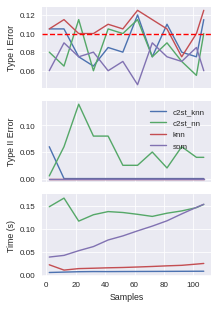

In [7]:
dc2_abs_fig = plot_errors(dc2_results, show_time=True)
dc2_abs_fig.savefig(os.path.join(plot_dir, 'dc2_mag_power_dim.eps'), bbox_inches='tight')

# DC2 SNR

In [8]:
dc2_snr = DC2Generator(snr=10)

In [9]:
#dc2_snr_results = stat_errors_vs_dimension(dc2_snr, dc2, tests, alpha=significance, samples=samples, repeat=repeat, step=10)
#dc2_snr_results.to_csv('../results/dimensionality/dc2_snr_dim.csv')
dc2_snr_results = pandas.read_csv('../results/dimensionality/dc2_snr_dim.csv', index_col=[0, 1])

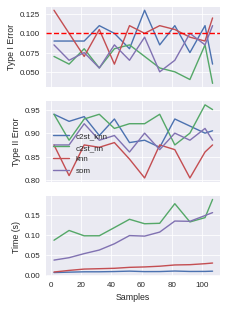

In [10]:
dc2_snr_fig = plot_errors(dc2_snr_results, show_time=True)
dc2_snr_fig.savefig(os.path.join(plot_dir, 'dc2_snr_power_dim.eps'), bbox_inches='tight')

# MNIST

In [11]:
mnist2 = MnistGenerator(2)
mnist3 = MnistGenerator(3)
mnist3.dimensions

784

In [12]:
#mnist_results = stat_errors_vs_dimension(mnist2, mnist3, tests, alpha=significance, samples=samples, repeat=repeat, step=50)
#mnist_results.to_csv('../results/dimensionality/mnist_dim.csv')
mnist_results = pandas.read_csv('../results/dimensionality/mnist_dim.csv', index_col=[0, 1])

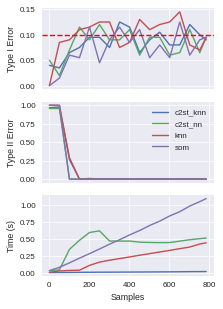

In [13]:
mnist_fig = plot_errors(mnist_results, show_time=True)
mnist_fig.savefig(os.path.join(plot_dir, 'mnist_power_dim.eps'), bbox_inches='tight')

# Normal (location)

In [14]:
means = np.zeros(1000)
means2 = np.ones(1000)

n1 = MultivariateNormalGenerator(means, cov=np.diag(np.ones(1000)))
n2 = MultivariateNormalGenerator(means2, cov=np.diag(np.ones(1000)))

In [15]:
#normal_loc_results = stat_errors_vs_dimension(n2, n1, tests, alpha=significance, samples=samples, repeat=repeat, step=100)
#normal_loc_results.to_csv('../results/dimensionality/normal_results_dim.csv')
normal_loc_results = pandas.read_csv('../results/dimensionality/normal_results_dim.csv', index_col=[0, 1])

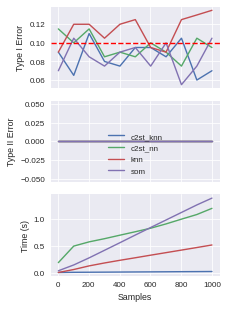

In [16]:
normal_loc_fig = plot_errors(normal_loc_results, show_time=True)
normal_loc_fig.savefig(os.path.join(plot_dir, 'normal_111_power_dim.eps'), bbox_inches='tight')

# Normal (location, fair)

In [17]:
means3 = np.zeros(1000)
means2[0] = 1.

n3 = MultivariateNormalGenerator(means3, cov=np.diag(np.ones(1000)))

In [18]:
#n3_results = stat_errors_vs_dimension(n3, n1, tests, alpha=significance, samples=samples, repeat=repeat, step=100)
#n3_results.to_csv('../results/dimensionality/normal_fair_dim.csv')
n3_results = pandas.read_csv('../results/dimensionality/normal_fair_dim.csv', index_col=[0, 1])

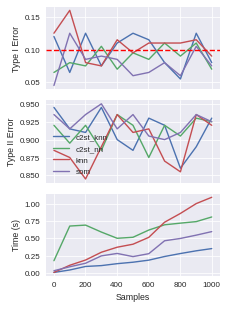

In [19]:
normal_fair_fig = plot_errors(n3_results, show_time=True)
normal_fair_fig.savefig(os.path.join(plot_dir, 'normal_fair_power_dim.eps'), bbox_inches='tight')

# Normal (scale)

In [20]:
ns1 = MultivariateNormalGenerator(means, wishart_df=len(means)+1)
ns2 = MultivariateNormalGenerator(means, wishart_df=len(means)+1)

In [21]:
#ns_results = stat_errors_vs_dimension(ns1, ns2, tests, alpha=significance, samples=samples, repeat=repeat, step=100)
#ns_results.to_csv('../results/dimensionality/normal_scale_dim.csv')
ns_results = pandas.read_csv('../results/dimensionality/normal_scale_dim.csv', index_col=[0, 1])

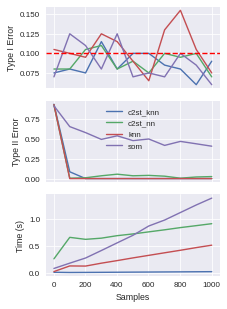

In [22]:
normal_scale_fig = plot_errors(ns_results, show_time=True)
normal_scale_fig.savefig(os.path.join(plot_dir, 'normal_scale_power_dim.eps'), bbox_inches='tight')

# Normal (scale, fair)

In [23]:
nsf1 = MultivariateNormalGenerator(means, wishart_df=len(means)*32)
nsf2 = MultivariateNormalGenerator(means, wishart_df=len(means)*32)

In [24]:
#nsf_results = stat_errors_vs_dimension(nsf1, nsf2, tests, alpha=significance, samples=samples, repeat=repeat, step=100)
#nsf_results.to_csv('../results/dimensionality/normal_scale_fair_dim.csv')
nsf_results = pandas.read_csv('../results/dimensionality/normal_scale_fair_dim.csv', index_col=[0, 1])

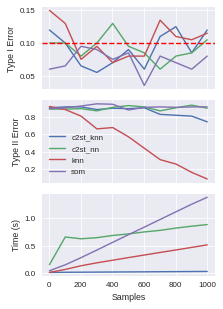

In [25]:
normal_scale_fair_fig = plot_errors(nsf_results, show_time=True)
normal_scale_fair_fig.savefig(os.path.join(plot_dir, 'normal_scale_fair_power_dim.eps'), bbox_inches='tight')